In [50]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data
hr_df = pd.read_csv('data/Employee.csv')
pd.set_option('display.max_columns', None)

In [44]:
hr_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


#### Exploring HR role in different department fields

In [22]:
hr_df.head()

# Looking at count and unique departments
hr_department = hr_df['Department'].value_counts()
hr_department_unique = hr_department.unique()

# Creating Department and Counts into Dataframe
hr_department_df = pd.DataFrame({
    'Department': hr_department.index,
    'Count': hr_department.values
})

# Creating Percentage Cclumn
hr_department_df['Percentage'] = (hr_department_df['Count']/hr_department_df['Count'].sum() * 100)
hr_department_df


,Department,Count,Percentage
0,Technology,961,65.374150
1,Sales,446,30.340136
2,Human Resources,63,4.285714


#### Job Title and Count

In [43]:
# Looking at count and unique job titles
hr_dfJobRole_count = hr_df['JobRole'].value_counts()
hr_dfJobUnique= hr_dfJobRole_count.unique()

# Turning into a dataframe
hr_jobs_df = pd.DataFrame({
    'JobTitle': hr_dfJobRole_count.index,
    'Count': hr_dfJobUnique
})

hr_jobs_df

,JobTitle,Count
0,Sales Executive,327
1,Software Engineer,294
2,Data Scientist,261
3,Machine Learning Engineer,146
4,Senior Software Engineer,132
5,Sales Representative,83
6,Engineering Manager,75
7,Analytics Manager,52
8,Manager,37
9,HR Executive,28


##### Boxplot for Different Job Titles

In [47]:
job_role_salaries = hr_df.groupby('JobRole')['Salary'].describe(percentiles=[.25, .5, .75])

job_role_salaries

,count,mean,std,min,25%,50%,75%,max
JobRole,,,,,,,,
Analytics Manager,52.0,346484.230769,118080.676209,107863.0,252839.50,355858.5,448177.75,547204.0
Data Scientist,261.0,56079.494253,43547.070678,20387.0,32456.00,44057.0,65416.00,455643.0
Engineering Manager,75.0,286258.506667,91001.990610,115110.0,215367.50,292500.0,336153.50,539998.0
HR Business Partner,7.0,314002.428571,104142.207510,190466.0,229615.00,309964.0,396225.50,445906.0
HR Executive,28.0,94362.321429,43767.654180,41745.0,55655.25,89376.0,131310.75,201564.0
HR Manager,4.0,449330.750000,92157.549484,315071.0,426056.00,486156.0,509430.75,509940.0
Machine Learning Engineer,146.0,130164.616438,76486.269014,39456.0,69932.50,98598.5,194454.00,366078.0
Manager,37.0,317531.054054,95375.631038,135407.0,265712.00,313891.0,377203.00,513262.0
Recruiter,24.0,37647.500000,15103.645094,20583.0,26099.00,30853.5,48956.50,70703.0


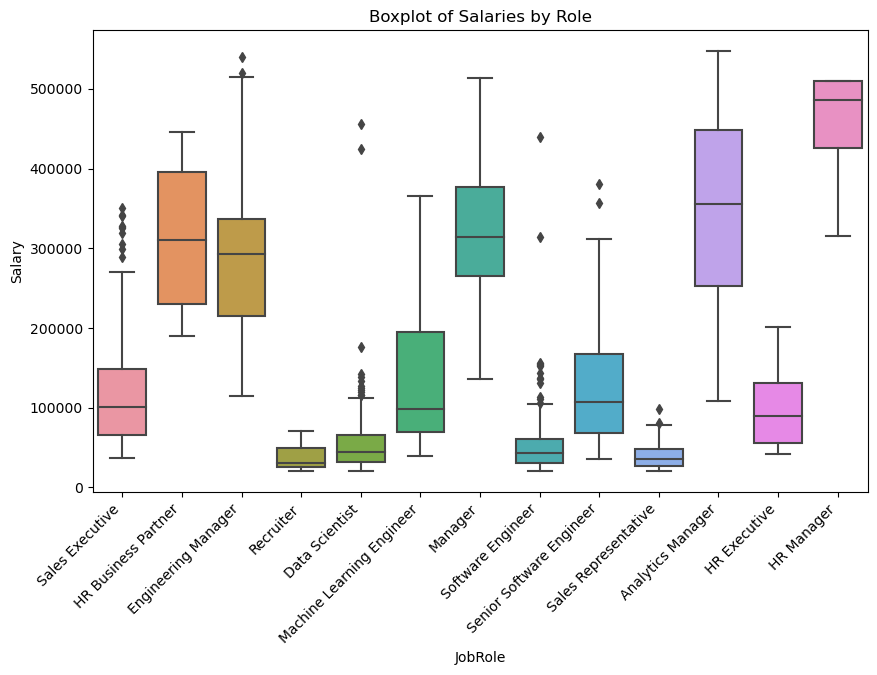

In [ ]:
# Create boxplot based on job title and salary

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='Salary', data=hr_df)
plt.xticks(rotation=45, ha='right')  
plt.title('Boxplot of Salaries by Role')
plt.show()